# Stock Market Prediction LSTM (New)

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('AAPL.csv')

In [5]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [7]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [9]:
df1=df.reset_index()['close']


In [11]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

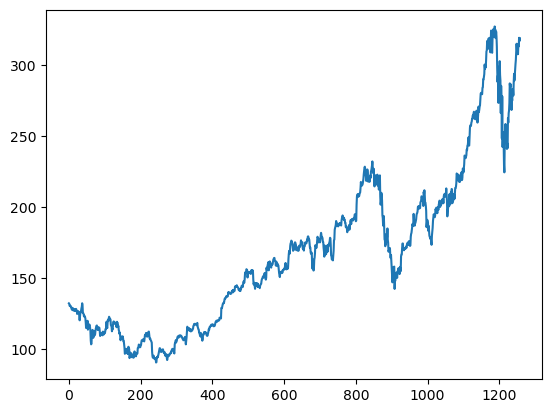

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [15]:
import numpy as np

In [17]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [19]:
type(df1)

pandas.core.series.Series

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

#df1=scaler.fit_transform(np.array(df1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [23]:
df1.shape

(1258, 1)

In [25]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [27]:
len(df1)

1258

In [29]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)           # 817
test_size=len(df1)-training_size           # 1258-817

train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]  # 0 to 816, 817 to 1257

In [31]:
training_size,test_size

(817, 441)

In [ ]:
#train_data

In [ ]:
#test_data

In [33]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):  #time_step=1
    dataX, dataY = [], []
    l = len(dataset)-time_step-1     
   
    for i in range(l):    # 817 - 99
        a = dataset[i:(i+time_step), 0]    
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [35]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [37]:
X_train.shape[0]

716

In [39]:
print(X_train.shape)

(716, 100)


In [41]:
print(X_test.shape)

(340, 100)


In [43]:
# reshape input to be [samples, time steps, features] which is required for LSTM

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [45]:
### Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [47]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')


C:\Users\Sreedhar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - loss: 0.0219 - val_loss: 0.0774
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 0.0035 - val_loss: 0.0105
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 0.0011 - val_loss: 0.0050
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 8.4180e-04 - val_loss: 0.0045
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 7.2676e-04 - val_loss: 0.0055
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 7.1112e-04 - val_loss: 0.0056
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 6.7586e-04 - val_loss: 0.0040
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 6.2637e-04 - val_loss: 0.0045
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 6.1133e-04 - val_loss: 0.0049
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 5.5951e-04 - val_loss: 0.0041


In [51]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [53]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [55]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))   

142.69807358686498

In [57]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))   

235.1668731416531

# Predict the output for next 10 days

In [59]:
len(test_data)

441

In [61]:
# x_input=test_data[341:]
x_input=test_data[341:].reshape(1,-1)  # to convert data into 2D array(row,col)
x_input.shape

(1, 100)

In [63]:
# to convert into list

temp_input=list(x_input)
# temp_input
temp_input=temp_input[0].tolist()
# print(len(temp_input))

In [65]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0

while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        
        lst_output.extend(yhat.tolist())  # to add prediction in new list
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input)  #, verbose=0
        print('predicted value is',yhat[0])
        temp_input.extend(yhat[0].tolist())
        print('length of temp input is',len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
predicted value is [0.88318545]
length of temp input is 101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096 

In [67]:
print('predicted val for next 10 days',lst_output)

predicted val for next 10 days [[0.8831854462623596], [0.8883207440376282], [0.8922967314720154], [0.8951576948165894], [0.8970513939857483], [0.8981632590293884], [0.8986753225326538], [0.8987485766410828], [0.8985138535499573], [0.8980720043182373]]


# Graphical Representation

In [69]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

In [71]:
import matplotlib.pyplot as plt

In [73]:
len(df1)

1258

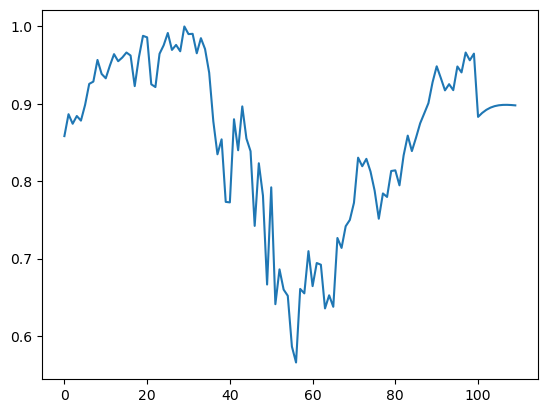

In [75]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1158:])

## Demonstration of reshape(-1,1)

ValueError: Expected 2D array, got 1D array instead:
array=[2020. 1992. 1972.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [77]:
a = np.array([1,2,3])
a

array([1, 2, 3])

In [79]:
a1 = a.reshape(-1,1)
print(a1)
print(a1.shape)

[[1]
 [2]
 [3]]
(3, 1)


In [81]:
a2 = a1.reshape(1,-1)
print(a2)
print(a2.shape)

[[1 2 3]]
(1, 3)
